In [31]:
library(Seurat)
library(tidyverse)
library(viridis)
library(RColorBrewer)
options(stringsAsFactors = FALSE)

source('../scripts/plotting.R')

In [32]:
get_40k_sc_data <- function() {
    load('../processing/seurat/sc_40k.rda')
    seurat_obj <- mb_mt
    return(seurat_obj)
}

get_1k_sc_data <- function() {
    load('../processing/seurat/sc_1k.rda')
    seurat_obj <- mb_mt_1k
    return(seurat_obj)
}

### Panel 3A

pdf 
  2

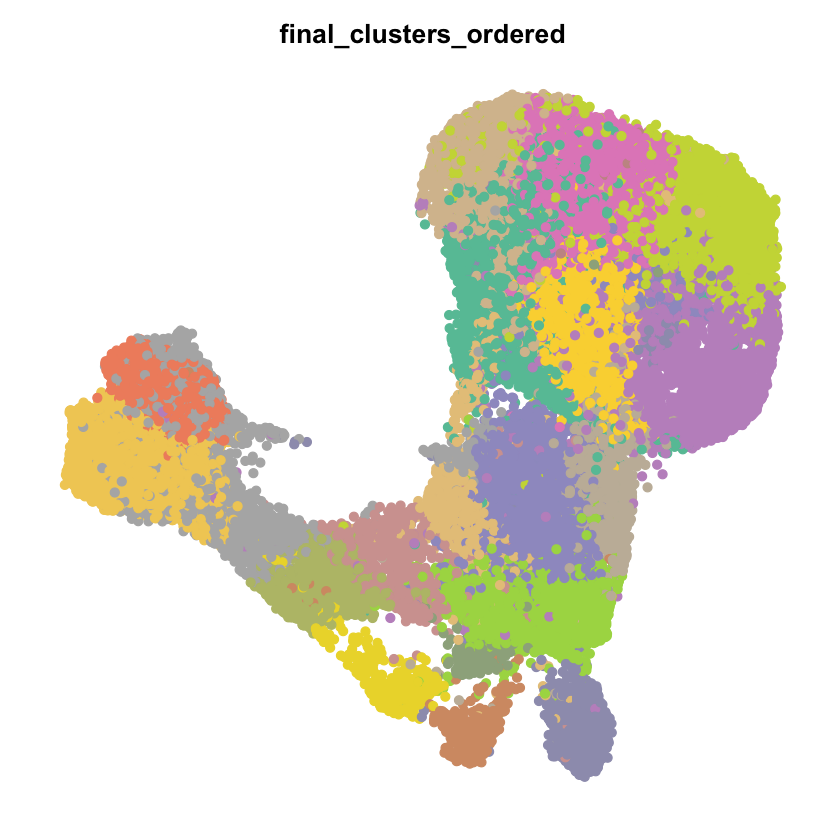

In [33]:
seurat_obj = get_40k_sc_data()
colors = get_40k_clust_colors()
p = DimPlot(
  object = seurat_obj,pt.size = 2.2,
  group.by = 'final_clusters_ordered',
  label = F,label.size = 6,
  repel = TRUE)  + NoLegend() + NoAxes()+ scale_color_manual(values = colors)

fname = 'figures/shortreads_40k_clusters.pdf'
pdf(fname, width = 5.5, height = 5)
p
dev.off()
p

pdf 
  2

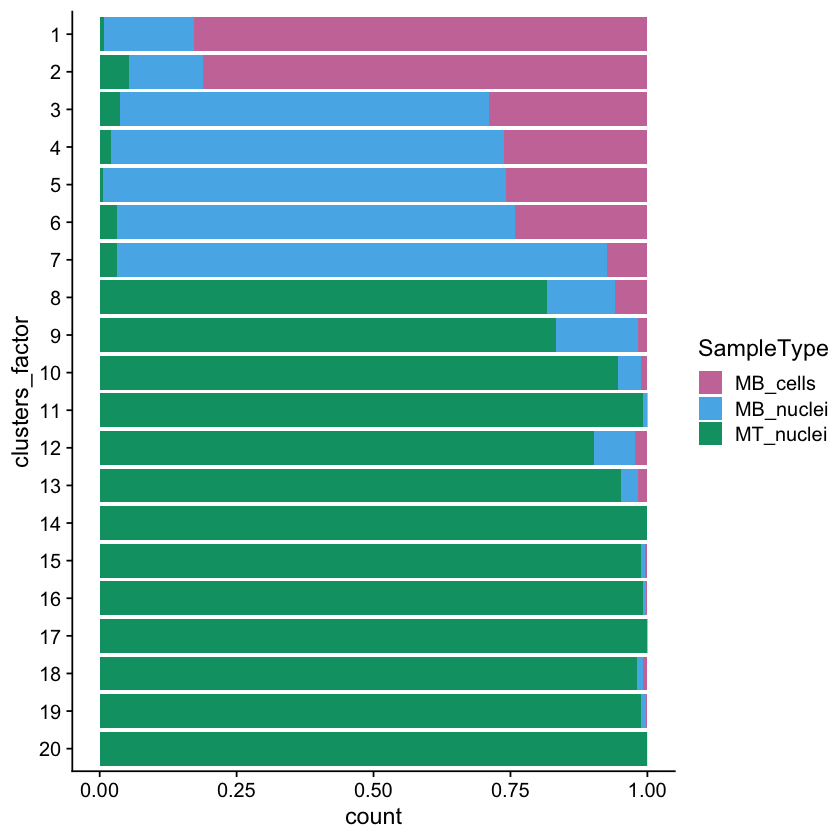

In [34]:
colors = get_sample_colors()


cluster_levels <- rev(as.numeric(levels(seurat_obj$final_clusters_ordered)))
seurat_obj$clusters_factor <- factor(
    seurat_obj$final_clusters_ordered,
    cluster_levels
)

p = ggplot(seurat_obj@meta.data, aes(x=clusters_factor, fill=SampleType)) + 
    geom_bar(position = "fill")  + 
    scale_fill_manual(values=colors) + 
    coord_flip()
fname = 'figures/shortreads_40k_barplot.pdf'
pdf(file = fname,
    width = 3.2,
    height = 4.5)
p
dev.off()
p

### Panel 3B

pdf 
  2

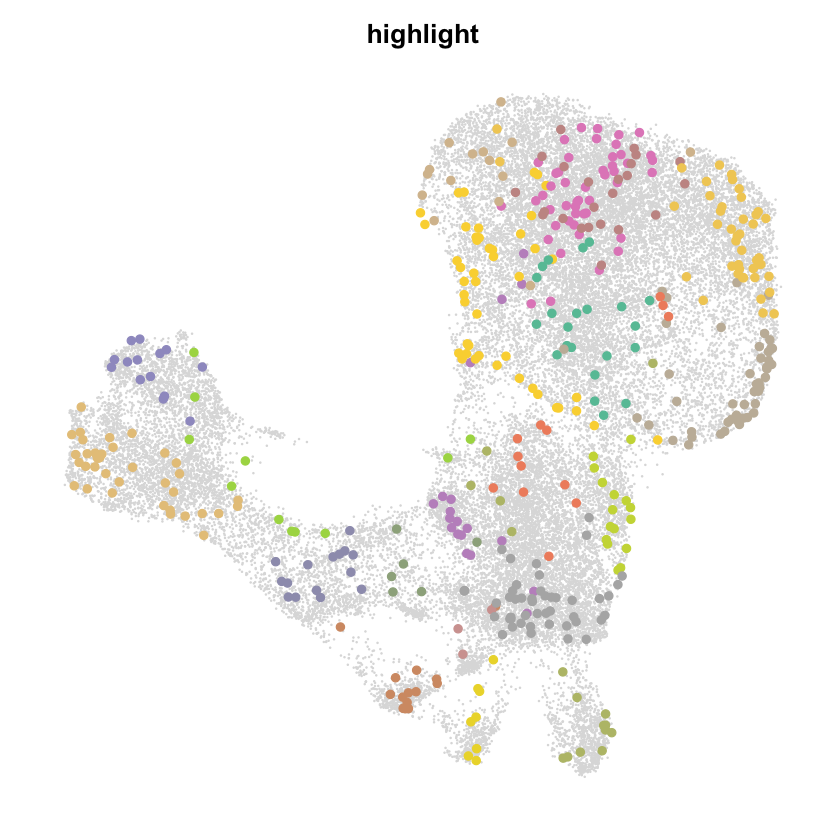

In [35]:
seurat_1k = get_1k_sc_data()
seurat_40k = get_40k_sc_data()

pb_ids_vel_464_plot = paste0("single_cells_barcoded_headAligned_sorted_ZE3GQ:",as.character(colnames(seurat_1k)),"_1kx")

c1 <- WhichCells(seurat_40k, idents = "1")
c1_filt = c1[c1 %in% pb_ids_vel_464_plot]
c2 <- WhichCells(seurat_40k, idents ="2")
c2_filt = c2[c2 %in% pb_ids_vel_464_plot]
c3 <- WhichCells(seurat_40k, idents ="3")
c3_filt = c3[c3 %in% pb_ids_vel_464_plot]
c4 <- WhichCells(seurat_40k, idents ="4")
c4_filt = c4[c4 %in% pb_ids_vel_464_plot]
c5 <- WhichCells(seurat_40k, idents ="5")
c5_filt = c5[c5 %in% pb_ids_vel_464_plot]
c6 <- WhichCells(seurat_40k, idents ="6")
c6_filt = c6[c6 %in% pb_ids_vel_464_plot]
c7 <- WhichCells(seurat_40k, idents ="7")
c7_filt = c7[c7 %in% pb_ids_vel_464_plot]
c8 <- WhichCells(seurat_40k, idents ="8")
c8_filt = c8[c8 %in% pb_ids_vel_464_plot]
c9 <- WhichCells(seurat_40k, idents ="9")
c9_filt = c9[c9 %in% pb_ids_vel_464_plot]
c10 <- WhichCells(seurat_40k, idents ="10")
c10_filt = c10[c10 %in% pb_ids_vel_464_plot]
c11 <- WhichCells(seurat_40k, idents ="11")
c11_filt = c11[c11 %in% pb_ids_vel_464_plot]
c12 <- WhichCells(seurat_40k, idents ="12")
c12_filt = c12[c12 %in% pb_ids_vel_464_plot]
c13 <- WhichCells(seurat_40k, idents ="13")
c13_filt = c13[c13 %in% pb_ids_vel_464_plot]
c14 <- WhichCells(seurat_40k, idents ="14")
c14_filt = c14[c14 %in% pb_ids_vel_464_plot]
c15 <- WhichCells(seurat_40k, idents ="15")
c15_filt = c15[c15 %in% pb_ids_vel_464_plot]
c16 <- WhichCells(seurat_40k, idents ="16")
c16_filt = c16[c16 %in% pb_ids_vel_464_plot]
c17 <- WhichCells(seurat_40k, idents ="17")
c17_filt = c17[c17 %in% pb_ids_vel_464_plot]
c18 <- WhichCells(seurat_40k, idents ="18")
c18_filt = c18[c18 %in% pb_ids_vel_464_plot]
c19 <- WhichCells(seurat_40k, idents ="19")
c19_filt = c19[c19 %in% pb_ids_vel_464_plot]
c20 <- WhichCells(seurat_40k, idents ="20")
c20_filt = c20[c20 %in% pb_ids_vel_464_plot]

colors = get_40k_clust_colors()
p = DimPlot(seurat_40k, group.by="seurat_clusters", sizes.highlight = 2,
        cells.highlight= list(c1_filt, c2_filt, c3_filt, c4_filt, c5_filt,
                              c6_filt, c7_filt, c8_filt, c9_filt, c10_filt, 
                              c11_filt, c12_filt, c13_filt, c14_filt, c15_filt,
                              c16_filt , c17_filt, c18_filt, c19_filt, c20_filt), 
        cols.highlight=colors, cols= "#DDDDDD")+
        NoAxes() + NoLegend()
fname="figures/shortreads_40k_umap_464.pdf"
pdf(file=fname,
    width = 7, 
    height = 6)
p
dev.off()  
p

### Panel 3C

pdf 
  2

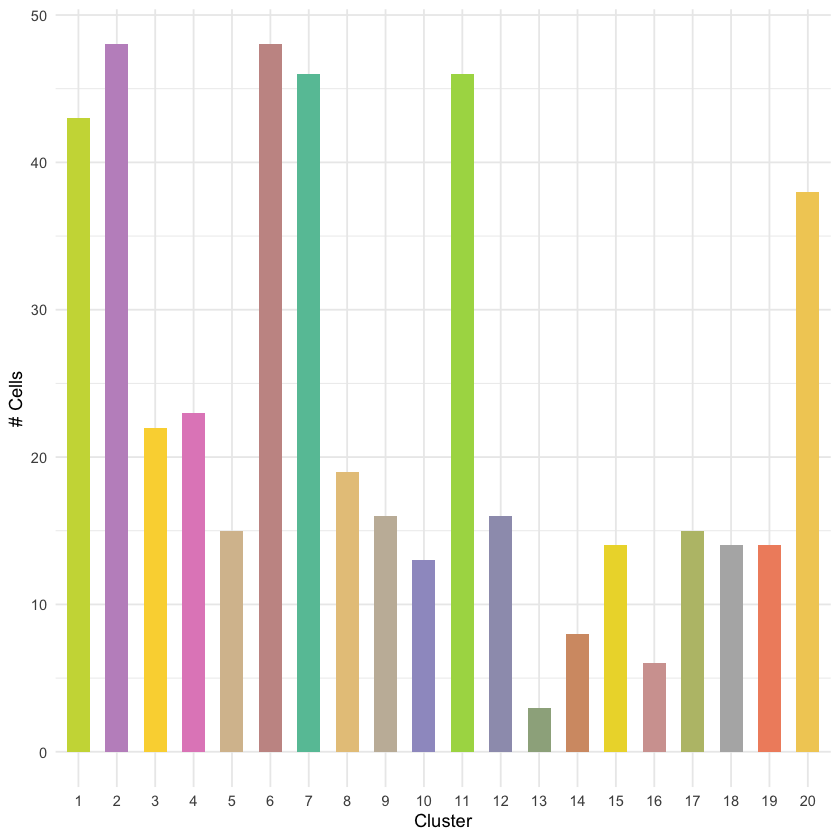

In [36]:
pb_cells_in_bigumap = c(length(c1_filt),length(c2_filt),length(c3_filt),length(c4_filt),length(c5_filt),
                       length(c6_filt),length(c7_filt),length(c8_filt),length(c9_filt),length(c10_filt),
                       length(c11_filt),length(c12_filt),length(c13_filt),length(c14_filt),length(c15_filt),
                       length(c16_filt),length(c17_filt),length(c19_filt),length(c19_filt),length(c20_filt))

histog = as.data.frame(matrix(, nrow = 20, ncol = 3))
colnames(histog) = c('PB_Cells','Total','Cluster_ID')
histog$PB_Cells  = pb_cells_in_bigumap
histog$Total = sum(histog$PB_Cells)
histog$Cluster_ID = c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20")
histog$Fraction = histog$PB_Cells/histog$Total
histog$Percent = histog$Fraction*100

histog$Cluster_ID <- ordered(histog$Cluster_ID , 
                             levels = c("1","2","3","4","5","6","7","8",
                                        "9","10","11","12","13","14","15","16",
                                        "17","18","19","20"))
fname="figures/cluster_hist_464.pdf"
pdf(file=fname,
    width=4,height=2.5)
colors = get_40k_clust_colors()
p = ggplot(data=histog, aes(x=Cluster_ID, y=PB_Cells)) +
  geom_bar(stat="identity", fill=colors,width=0.6,position = position_dodge(width=0.5))+
  theme_minimal() + xlab("Cluster") + ylab("# Cells") 
p
dev.off()

p

### Panel 3D

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will rep

pdf 
  2

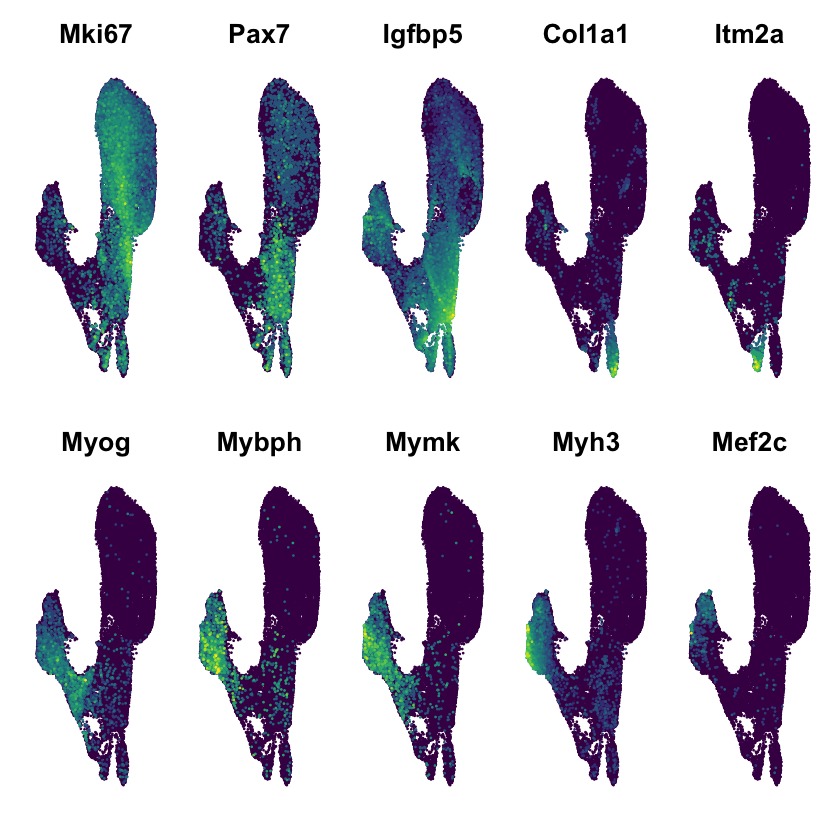

In [37]:
genes = c("Mki67","Pax7","Igfbp5","Col1a1","Itm2a","Myog","Mybph","Mymk","Myh3","Mef2c")
fname = "figures/genes_40k_umap.pdf"
pdf(file=fname,
    width = 9, 
    height = 4)
p = FeaturePlot(seurat_40k, order=T, pt.size = 0.1,
            features = genes, combine = TRUE,ncol =5)  & NoLegend() & NoAxes() & 
  scale_colour_gradientn(colours = viridis(11))
p
dev.off()
p

### Panel 3F

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message:
“Removed 106 rows containing missing values (geom_point).”


pdf 
  2

Warning message:
“Removed 106 rows containing missing values (geom_point).”


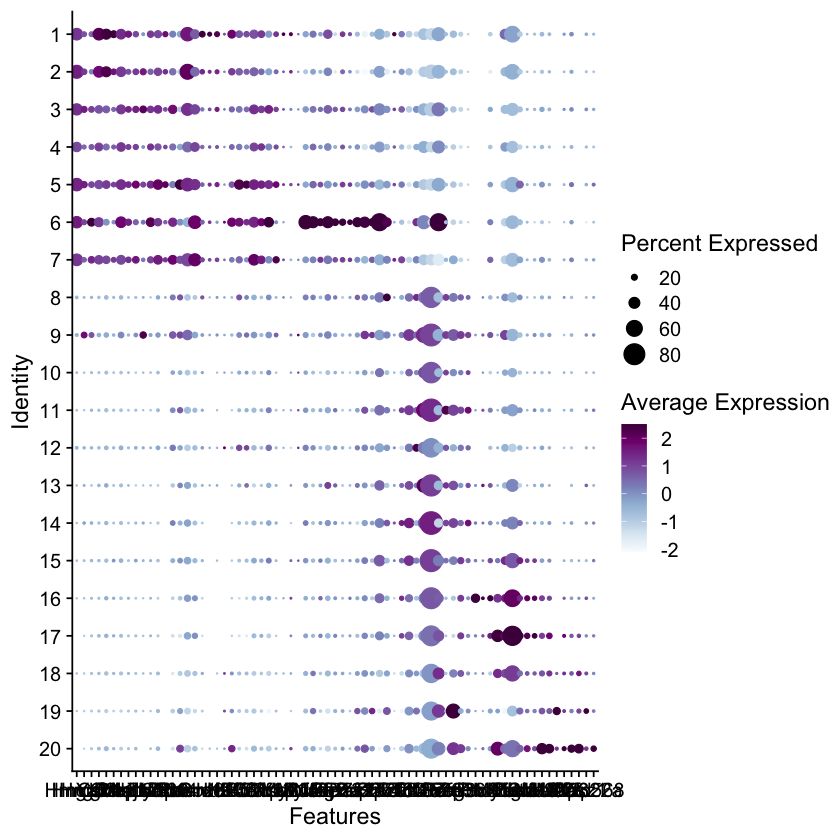

In [38]:
tfs_ordered = (c("Hmga2", "Hmgb2","Hmgb1","Ybx1","Csde1","Cnbp","Ssrp1","Dnajc2","Ahctf1","Mis18bp1","Lyar",
                 "Zbtb38","Nr4a2","Zfhx4","Jun","Pbrm1","Smarcc1","Sox9","Id1","Id2","Klf4","Klf5","Klf6","Klf7",
                 "Bclaf1","Cebpz","Zfhx3","Nsd2","Yap1","Myod1","Myf5","Pura","Mafg",
                 "Ncor2","Bbx","Rere","Zfp131","Pias2","Baz2a","Baz2b","Zfp871",
                 "Sox4","Zfp292","Tcf3","Tcf12","Tcf4","Tcf25","Nfix","Zbtb20","Son",
                 "Pax7","Peg3","Zeb1","Zfp36l1","Sox8","Prox1","Prdm2","Myog","Nfic","Purb","Tead1","Zbtb18","Rreb1",
                 "Nfe2l1","Mef2a","Mef2c","Mef2d",
                 "Atf6","Casz1","Zfp322a","Zfp568"))

cluster_levels <- rev(as.numeric(levels(seurat_40k$final_clusters_ordered)))
seurat_40k$clusters_factor <- factor(
    seurat_40k$final_clusters_ordered,
    cluster_levels
)

Idents(seurat_40k) = seurat_40k$clusters_factor

fname = "figures/tf_dotplot.pdf"
pdf(file=fname,
    width = 15, 
    height = 7)
p = DotPlot(
  seurat_40k,
  assay = "SCT",dot.min = 0.01,
  features = tfs_ordered) & scale_colour_gradientn(colours = (brewer.pal(9,"BuPu"))) 
p
dev.off()
p